In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image

In [3]:
import sys
import os
import pandas as pd
import numpy as np
import itertools

In [4]:
import matplotlib.pyplot as plt

In [5]:
import igraph as ig

In [31]:
import squad_reboot

In [72]:
reload(squad_reboot)

<module 'squad_reboot' from '/home/cbleker/research/NIB/ADAPT/squad/squad-reboot/squad_reboot.py'>

## Example from [SQUADTransformation.ipynb](https://github.com/caramirezal/SQUADBookChapter/blob/master/SQUADTransformation.ipynb)

In [55]:
g1 = {'A': {'A': '+'}, 
      'B': {'A': '+', 'C': '-'}, 
      'C': {'A': '-', 'B': '-'}}

In [56]:
B = squad_reboot.SquadRegulatoryNetwork(g1)

Status: End


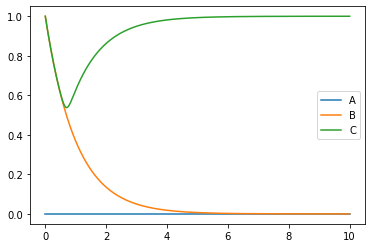

In [57]:
initial_state = {"A":0, "B":1, "C":1}
_ = B.dynamic_simulation(initial_state=initial_state, h=50, t_max=10)

## Example from [SQUAD_implementation.ipynb](https://github.com/caramirezal/SQUADBookChapter/blob/master/SQUAD_implementation.ipynb)

In [58]:
# error in original https://github.com/caramirezal/SQUADBookChapter/blob/master/SQUAD_implementation.ipynb??
g2 = {"A":{"A":"+", "B":"-", "X":"+"},  
      "B":{"A":"-", "Y":"+", "B":"+"}, 
      "X":{"Z":"-", "A":"+"},
      "Y":{"A":"-", "B":"+"},
      "Z":{"B":"+"}}


In [74]:
B = squad_reboot.SquadRegulatoryNetwork(g2)

Status: Event at  10:
          X -> 0.25 (duration  0)

Status: Event at  20:
          Y -> 0.25 (duration  0)

Status: End


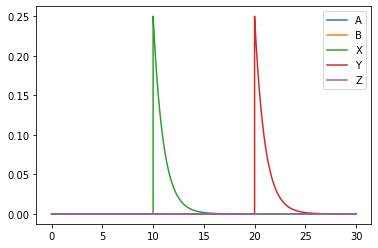

In [66]:
initial_state = 0
events = {10:{"X":{"perturbation":.25}}, 
          20:{"Y":{"perturbation":.25}}}
_ = B.dynamic_simulation(events=events, initial_state=initial_state)

Status: Event at  10:
          Y -> 1.00 (duration  0)

Status: Event at  20:
          X -> 1.00 (duration  0)

Status: End


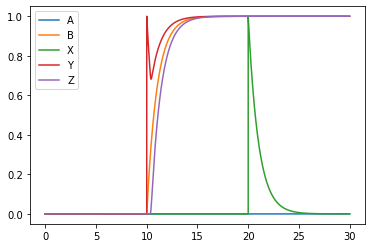

In [67]:
events = {10:{"Y":{"perturbation":1}}, 
          20:{"X":{"perturbation":1}}}
_ = B.dynamic_simulation(events=events, initial_state=initial_state)

Status: Event at  10:
          X -> 1.00 (duration  0)

Status: Event at  20:
          Y -> 1.00 (duration  0)

Status: End


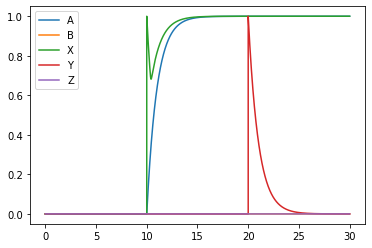

In [68]:
events = {10:{"X":{"perturbation":1}}, 
          20:{"Y":{"perturbation":1}}}
_ = B.dynamic_simulation(events=events, initial_state=initial_state)

Status: Event at   7:
          Y -> 0.30 (duration  5)

Status: Event at   9:
          A -> 0.50 (duration  1)

Status: Event at  10:
          A -> released
          X -> 0.25 (duration  5)
          Z -> 0.00 (duration  0)

Status: Event at  12:
          Y -> released

Status: Event at  15:
          X -> released

Status: Event at  20:
          Y -> 1.00 (duration  0)

Status: End


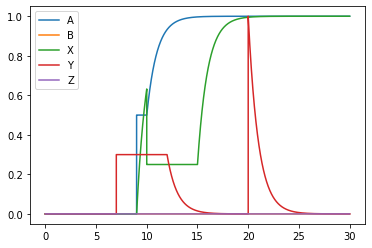

In [75]:
events = {9:{"A":{"perturbation":0.5, "duration":1}}, 
          7:{"Y":{"perturbation":0.3, "duration":5}},
          10:{"X":{"perturbation":.25, "duration":5}, "Z":{"perturbation":0}}, 
          20:{"Y":{"perturbation":1}}
         }
_ = B.dynamic_simulation(events=events, initial_state=initial_state)

## A. thaliana network from graphml


In [77]:
import xmltodict

In [78]:
# load grapg
g_path = "../squad-reboot/examples/Athaliana.graphml"
g = ig.Graph.Read_GraphML(g_path)

# add edge attributes (i.e. activator or inhibitor)
with open(g_path) as f:
    d = xmltodict.parse(f.read())
    
D = {}
W = {}
N = {}

for v in d["graphml"]["graph"]["node"]:
    N[v["@id"]] = v["data"]["y:ShapeNode"]["y:NodeLabel"]["#text"]


for e in d["graphml"]["graph"]["edge"]:
    if e["data"]["y:PolyLineEdge"]['y:Arrows']['@target'] == "standard":
        D[e["@id"]] = "+"
        W[e["@id"]] = 1
    elif e["data"]["y:PolyLineEdge"]['y:Arrows']['@target'] == "white_diamond":
        D[e["@id"]] = "-"
        W[e["@id"]] = -1
    else: 
        print(e["@id"])
        
for e in g.es():
    e["type"] = D[e["id"]]
    e["weight"] = W[e["id"]]

for v in g.vs():
    v["id"] = N[v["id"]]
    
del D, W, N

<ipython-input-78-9f3a9d552c40>:3: RuntimeWarning: Attribute target 'graphml' is not handled; ignoring corresponding attribute specifications at foreign-graphml.c:609
  g = ig.Graph.Read_GraphML(g_path)
<ipython-input-78-9f3a9d552c40>:3: RuntimeWarning: Attribute target 'port' is not handled; ignoring corresponding attribute specifications at foreign-graphml.c:615
  g = ig.Graph.Read_GraphML(g_path)
<ipython-input-78-9f3a9d552c40>:3: RuntimeWarning: Ignoring <key id="d6"> because of a missing or unknown 'attr.type' attribute at foreign-graphml.c:644
  g = ig.Graph.Read_GraphML(g_path)
<ipython-input-78-9f3a9d552c40>:3: RuntimeWarning: Ignoring <key id="d10"> because of a missing or unknown 'attr.type' attribute at foreign-graphml.c:644
  g = ig.Graph.Read_GraphML(g_path)
<ipython-input-78-9f3a9d552c40>:3: RuntimeWarning: unknown attribute key 'd6' in a <data> tag, ignoring attribute at foreign-graphml.c:792
  g = ig.Graph.Read_GraphML(g_path)
<ipython-input-78-9f3a9d552c40>:3: RuntimeW

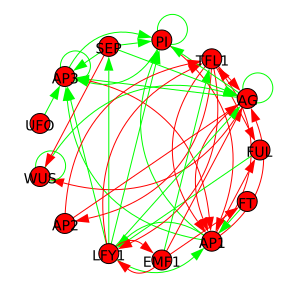

In [79]:
edge_color_dict = {"+":"green", "-":"red"}
layout = g.layout("circular")
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = g.vs["id"]
visual_style["edge_color"] = [edge_color_dict[e["type"]] for e in g.es()]
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 40
visual_style["arrow_size"] = 900
visual_style["arrow_width"] = 0

ig.plot(g, **visual_style)

In [80]:
# standard dictionary
g3 = {node["id"]:{} for node in g.vs()}
for e in g.es():
    source = g.vs()[e.source]["id"]
    target = g.vs()[e.target]["id"]
    sign = e["type"]
    g3[target][source] = sign
g3

{'FUL': {'AP1': '-', 'TFL1': '-'},
 'FT': {'EMF1': '-'},
 'AP1': {'AP3': '-',
  'PI': '-',
  'FT': '+',
  'TFL1': '-',
  'AG': '-',
  'LFY1': '+'},
 'EMF1': {'LFY1': '-'},
 'LFY1': {'AP1': '+', 'FUL': '+', 'TFL1': '-', 'EMF1': '-'},
 'AP2': {'TFL1': '-'},
 'WUS': {'AG': '-', 'WUS': '+', 'SEP': '-'},
 'UFO': {},
 'AP3': {'AP3': '+',
  'PI': '+',
  'AP1': '+',
  'UFO': '+',
  'AG': '+',
  'LFY1': '+',
  'SEP': '+'},
 'SEP': {'LFY1': '+'},
 'PI': {'PI': '+', 'AP1': '+', 'LFY1': '+', 'SEP': '+', 'AP3': '+', 'AG': '+'},
 'TFL1': {'AP1': '-', 'EMF1': '+', 'LFY1': '-', 'AP2': '-'},
 'AG': {'AP1': '-',
  'TFL1': '-',
  'EMF1': '-',
  'AG': '+',
  'WUS': '+',
  'LFY1': '+',
  'SEP': '+',
  'AP2': '-'}}

In [81]:
B = squad_reboot.SquadRegulatoryNetwork(g3)

Status: End


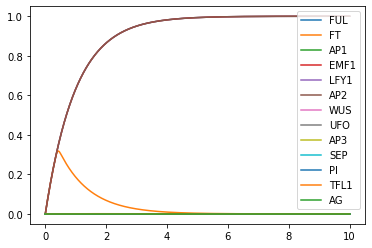

In [82]:
_ = B.dynamic_simulation(t_max=10)

In [ ]:
from importlib import reload

import xmltodict

# https://github.com/hklarner/PyBoolNet/blob/master/Docs/Sphinx/source/Development.rst
import sys
sys.path.insert(0,'/home/cbleker/research/NIB/ADAPT/squad/SQUAD-reboot/dependencies/PyBoolNet')
import PyBoolNet